1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

<function matplotlib.pyplot.show(*args, **kw)>

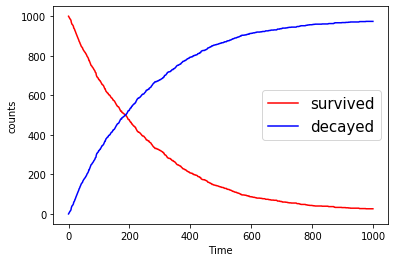

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import math
import numpy as np

def pt (t):
    return 1-2**(-t/(3.052*60))
def pdf_expo(t):
    return 2**(-t/(3.052*60)*math.log(2)/(3.052*60))              
time=np.arange(0,1000)
probs=np.random.uniform(0,1,1000)
Ti=np.array([1000])
Pb=np.array([0])

for t in time[1:]:
    decay=0
    for i in range(len(probs)):
        if(i>=len(probs)):
            break
        if(probs[i]<(pt(t))):
            probs=np.delete(probs,[i])
            i-=1
            decay+=1
    Pb=np.append(Pb, Pb[-1]+decay)
    Ti=np.append(Ti, Ti[-1]-decay)


plt.plot(time, Ti, c="red", label="survived")
plt.plot(time, Pb, c="blue", label="decayed")
plt.xlabel("Time")
plt.ylabel("counts")
plt.legend(fontsize=15,loc="best")

plt.show




(array([1000.,  855.,  738.,  618.,  533.,  451.,  378.,  319.,  264.,
         220.,  187.,  153.,  127.,  109.,   92.,   77.,   70.,   57.,
          48.,   41.,   28.,   28.,   22.,   19.,   18.,   15.,   14.,
          12.,    9.,    8.,    8.,    5.,    5.,    4.,    3.,    2.,
           2.,    2.,    2.,    2.,    2.,    1.,    1.,    1.,    1.,
           1.,    1.,    1.,    1.,    1.]),
 array([2.26915456e-01, 4.45337057e+01, 8.88404960e+01, 1.33147286e+02,
        1.77454077e+02, 2.21760867e+02, 2.66067657e+02, 3.10374447e+02,
        3.54681238e+02, 3.98988028e+02, 4.43294818e+02, 4.87601609e+02,
        5.31908399e+02, 5.76215189e+02, 6.20521979e+02, 6.64828770e+02,
        7.09135560e+02, 7.53442350e+02, 7.97749140e+02, 8.42055931e+02,
        8.86362721e+02, 9.30669511e+02, 9.74976302e+02, 1.01928309e+03,
        1.06358988e+03, 1.10789667e+03, 1.15220346e+03, 1.19651025e+03,
        1.24081704e+03, 1.28512383e+03, 1.32943062e+03, 1.37373741e+03,
        1.41804420e+03, 

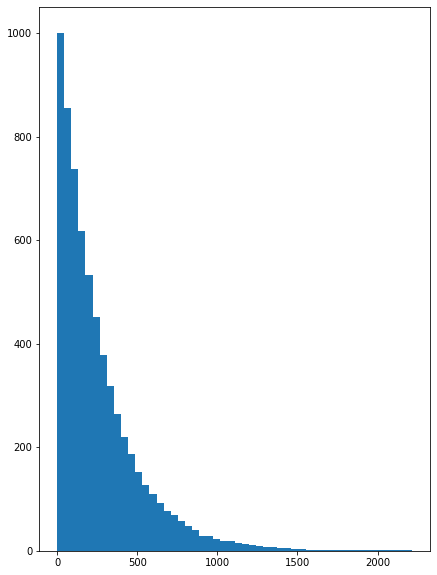

In [2]:
def exp_pdf(p):
    return -np.log(1-p)/(np.log(2)/(3.056*60))
x = np.random.uniform(0,1,1000)
fig, ax = plt.subplots(1,1, figsize=(7, 10))
t=exp_pdf(x)
ax.hist(t,bins=50,cumulative=-1)

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

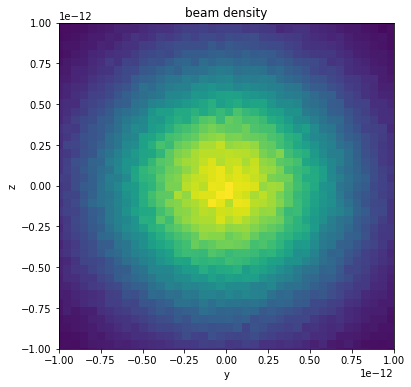

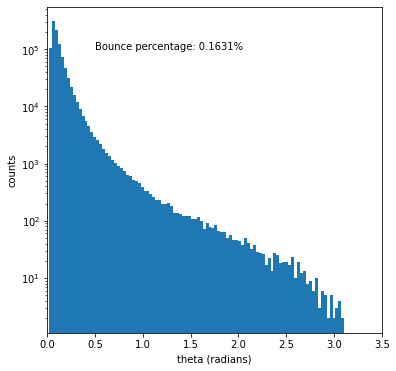

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

Z=79
e=1.602176565*10**(-19)
E=7.7*10**(6)*e
a0=5.2917721067*10**(-11)
e0=8.8541878176*10**(-12)

constants=Z*e**2/(2*np.pi*e0*E)

n=10**6
y = np.random.normal(0, a0/100, n)
z = np.random.normal(0, a0/100, n)
b=np.array([math.sqrt(yb**2+zb**2) for yb,zb in zip(y,z)])
plt.figure(figsize=(6,6))
plt.hist2d(y, z,bins=100)
plt.xlabel('y')
plt.ylabel('z')
plt.xlim(-10**(-12),10**(-12))
plt.ylim(-10**(-12),10**(-12))

plt.title("beam density")
plt.show()



theta=2*np.arctan(constants/b)
n_bounce=np.sum(theta>np.pi/2)

plt.figure(figsize=(6,6))
plt.hist(theta,bins=100)
plt.xlabel('theta (radians)')
plt.ylabel('counts')
plt.xlim(0,3.5)
plt.yscale('log')
plt.text(0.5,1e5, "Bounce percentage: "+str(n_bounce/1e4)+"%")

plt.show()



3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [4]:
import numpy as np
import math

def f3 (x):
    return (math.sin(1.0/(x*(2-x))))**2

def hitmiss (a, b, n):
    #numbers between 0 and 1, perfect for the y, to be redefined for x
    points = np.random.random((n,2))
    #remap points
    points[:,0]*=(b-a)
    points[:,0]+=a
    #counting
    cont =0
    for p in points:
        if f3(p[0])>p[1]:
            cont+=1
    area= (b-a)*1*cont/n
    return area
    
def av_hitmiss(a,b,n):
    suma=0
    for i in range (30):
        suma +=hitmiss(a,b,n)
    return suma/30

def mean_val (a,b,n):
    #geenrate and map on range
    samples=np.random.random(n)
    samples*=(b-a)
    samples+=a
    s=np.sum([f3(x) for x in samples])
    return s*(b-a)/n
    

print(av_hitmiss(0,2, 10000))
print(av_hitmiss(0,2, 10000))
print(av_hitmiss(0,2, 10000))
print(av_hitmiss(0,2, 10000))

print(mean_val(0,2, 10000))
print(mean_val(0,2, 10000))
print(mean_val(0,2, 10000))
print(mean_val(0,2, 10000))
    

1.4533933333333333
1.4494733333333332
1.4515266666666669
1.4497133333333332
1.4540389330931518
1.451755913195554
1.447514478041791
1.458286227134121


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [5]:
def dist(p):
    return np.sum(p**2)

def mc_int(n, dim):
    points=np.random.random((n,dim))
    cont=0
    for p in points:
        if dist(p)<1:
            cont+=1
    return (2**dim)*cont/n

print("\t my value \t etimated value")
print ("2dim\t",mc_int(10000, 2),"\t", math.pi)
print ("3dim\t",mc_int(10000, 3),"\t", math.pi*4/3)
print ("10dim\t",mc_int(10000, 10),"\t", math.pi**5/120) #volume ipersfera 10-dim
#servono più numeri
print ("10dim\t",mc_int(100000, 10),"\t", math.pi**5/120, " need more points to converge") #volume ipersfera 10-dim




	 my value 	 etimated value
2dim	 3.1448 	 3.141592653589793
3dim	 4.1984 	 4.1887902047863905
10dim	 1.8432 	 2.550164039877345
10dim	 2.53952 	 2.550164039877345  need more points to converge


In [6]:
x=np.arange(1,5,1)

integ=[mc_int(10**a,2)for a in x]
print(integ)

[4.0, 3.2, 3.148, 3.1376]


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [7]:
import numpy as np
import math

def make_grid(xmin, xmax, n):
    return np.random.uniform(xmin,xmax, int(n))

def integ_mean (f, a,b,N):
    x=f(np.random.uniform(a,b,int(N))*(b-a))
    return (b-a)*np.sum(x)/float(N)
    
def wx (x):
    return 1/np.sqrt(x)
def fx (x):
    return 1.0/(np.sqrt(x)*(np.exp(x)+1))

N=1e6

for i in range(6):
    N=10**i
    x=make_grid(0,1,N)
    w_integ=integ_mean(wx,0,1,N)
    tot_integ=np.sum(np.array([fx(xi)/wx(xi) for xi in x]))*w_integ/N
    print("Number of points : 10^", i, "\tintegral value: ",tot_integ)


Number of points : 10^ 0 	integral value:  0.40097245878388754
Number of points : 10^ 1 	integral value:  0.49669916760171057
Number of points : 10^ 2 	integral value:  0.7252949489210867
Number of points : 10^ 3 	integral value:  0.7300425920940372
Number of points : 10^ 4 	integral value:  0.7620327195553975
Number of points : 10^ 5 	integral value:  0.7642623134731534
